<a href="https://colab.research.google.com/github/mukulre/Projects/blob/main/Electricity_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/electricity.csv")
print(data.head())

           DateTime Holiday  HolidayFlag  DayOfWeek  WeekOfYear  Day  Month  \
0  01/11/2011 00:00     NaN            0          1          44    1     11   
1  01/11/2011 00:30     NaN            0          1          44    1     11   
2  01/11/2011 01:00     NaN            0          1          44    1     11   
3  01/11/2011 01:30     NaN            0          1          44    1     11   
4  01/11/2011 02:00     NaN            0          1          44    1     11   

   Year  PeriodOfDay ForecastWindProduction SystemLoadEA  SMPEA  \
0  2011            0                 315.31      3388.77  49.26   
1  2011            1                 321.80      3196.66  49.26   
2  2011            2                 328.57      3060.71  49.10   
3  2011            3                 335.60      2945.56  48.04   
4  2011            4                 342.90      2849.34  33.75   

  ORKTemperature ORKWindspeed CO2Intensity ActualWindProduction SystemLoadEP2  \
0           6.00         9.30       600.7

<ipython-input-1-6c93e9338038>:3: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/electricity.csv")


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 1536 non-null   object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [3]:
data["ForecastWindProduction"] = pd.to_numeric(data["ForecastWindProduction"], errors= 'coerce')
data["SystemLoadEA"] = pd.to_numeric(data["SystemLoadEA"], errors= 'coerce')
data["SMPEA"] = pd.to_numeric(data["SMPEA"], errors= 'coerce')
data["ORKTemperature"] = pd.to_numeric(data["ORKTemperature"], errors= 'coerce')
data["ORKWindspeed"] = pd.to_numeric(data["ORKWindspeed"], errors= 'coerce')
data["CO2Intensity"] = pd.to_numeric(data["CO2Intensity"], errors= 'coerce')
data["ActualWindProduction"] = pd.to_numeric(data["ActualWindProduction"], errors= 'coerce')
data["SystemLoadEP2"] = pd.to_numeric(data["SystemLoadEP2"], errors= 'coerce')
data["SMPEP2"] = pd.to_numeric(data["SMPEP2"], errors= 'coerce')

In [4]:
data.isnull().sum()

,0
DateTime,0
Holiday,36478
HolidayFlag,0
DayOfWeek,0
WeekOfYear,0
Day,0
Month,0
Year,0
PeriodOfDay,0
ForecastWindProduction,5


In [5]:
data = data.dropna()

<ipython-input-8-75fd342c4340>:7: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['DateTime'] = pd.to_datetime(data['DateTime'])


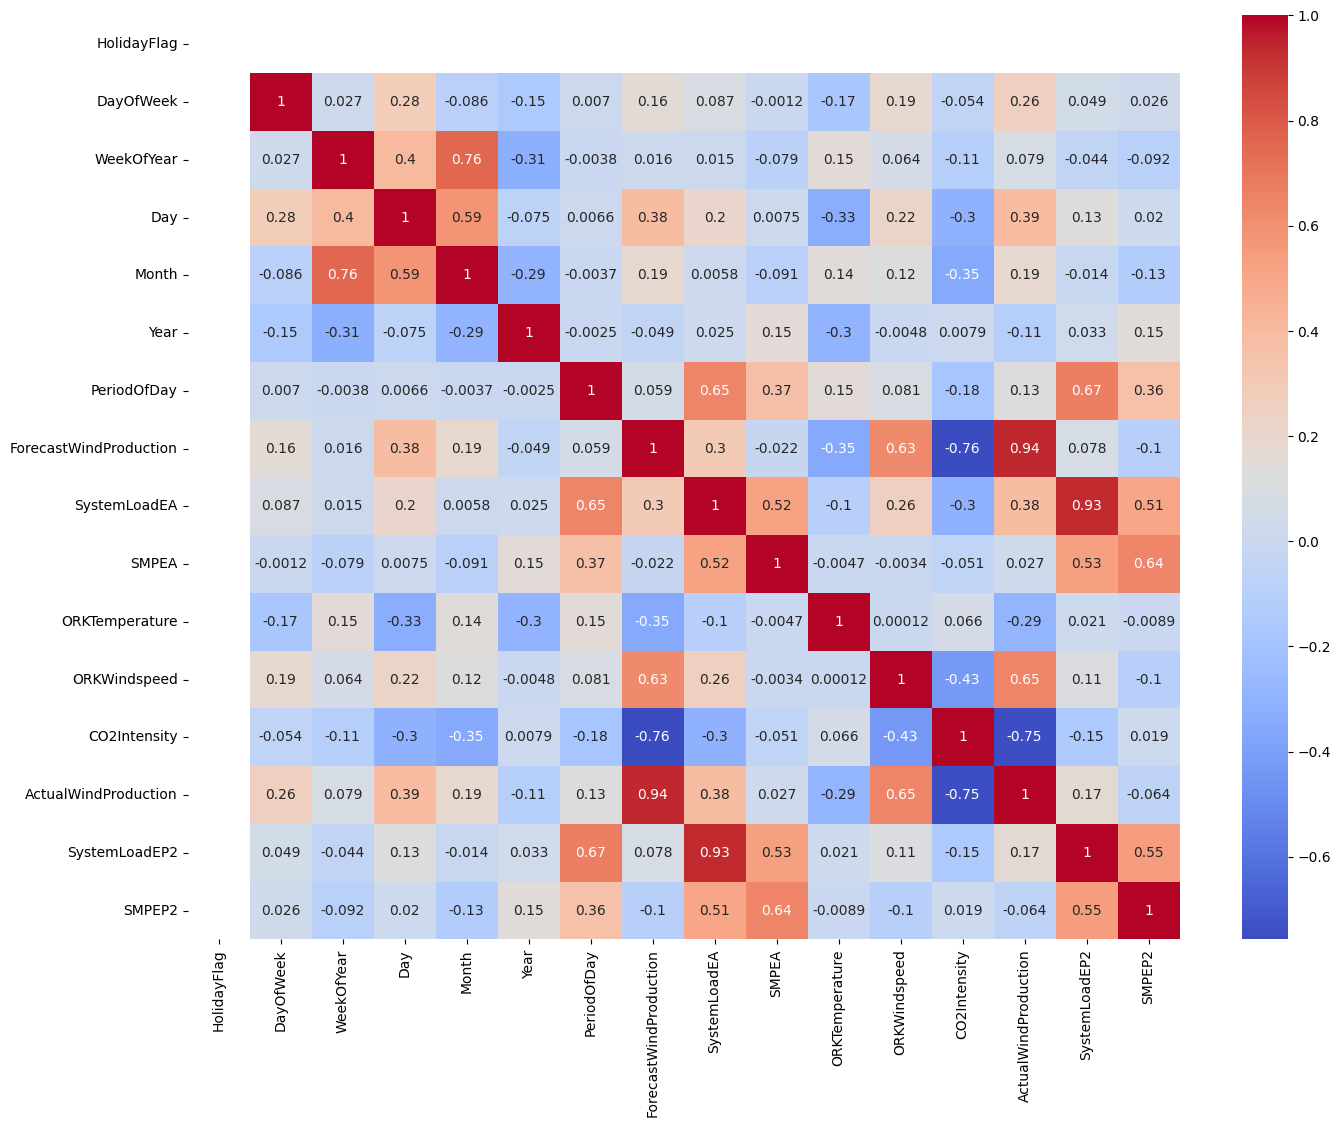

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'DateTime' is the column with the date string
# Convert 'DateTime' to datetime objects
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Extract numerical features for correlation analysis
numerical_features = data.select_dtypes(include=['number'])

# Calculate correlations on numerical features only
correlations = numerical_features.corr(method='pearson')

plt.figure(figsize=(16, 12))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

In [9]:

x = data[["Day", "Month", "ForecastWindProduction", "SystemLoadEA",
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity",
          "ActualWindProduction", "SystemLoadEP2"]]
y = data["SMPEP2"]
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.2,
                                                random_state=42)

In [10]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain, ytrain)

RandomForestRegressor()

In [11]:
#features = [["Day", "Month", "ForecastWindProduction", "SystemLoadEA", "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", "ActualWindProduction", "SystemLoadEP2"]]
features = np.array([[10, 12, 54.10, 4241.05, 49.56, 9.0, 14.8, 491.32, 54.0, 4426.84]])
model.predict(features)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([97.8839])